In [7]:
import pandas as pd

In [41]:
tr = pd.read_csv(r'C:\Users\User\OneDrive\Desktop\python\train.csv')

In [43]:
tr.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [45]:
tr.isnull().sum()[tr.isnull().sum() > 0]

Series([], dtype: int64)

In [47]:
tr = tr.drop(['ID'], axis = 1)

In [49]:
tr.select_dtypes(include = 'object').columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [52]:
tr[tr.select_dtypes(include = 'object').columns] = tr[tr.select_dtypes(include = 'object').columns].apply(le.fit_transform)

In [53]:
from sklearn.model_selection import train_test_split
tr_train,tr_test = train_test_split(tr, test_size= .2)

In [54]:
tr_train_x = tr_train.iloc[:,1::]
tr_train_y = tr_train.iloc[:,0]

tr_test_x = tr_test.iloc[:,1::]
tr_test_y = tr_test.iloc[:,0]

In [55]:
tr_train_y

40      101.44
1611     92.98
891     127.91
450     111.74
3869    118.86
         ...  
4106    113.10
3562    110.36
3692     92.58
2027     93.80
1997     81.07
Name: y, Length: 3367, dtype: float64

In [58]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(tr_train_x, tr_train_y)

LinearRegression()

In [62]:
Rsquare = linreg.score(tr_train_x , tr_train_y)
Rsquare

0.5876543919416928

In [63]:
N = tr_train_x.shape[0] # number of rows in training data
K = tr_train_x.shape[1] # number of columns in training data 
Adj_Rsq = 1 - (1 - Rsquare) * (N - 1)/(N - K - 1)
Adj_Rsq

0.5358008974166348

In [64]:
# prediction of values
pred_train = linreg.predict(tr_train_x)

In [66]:
err_train = tr_train_y - pred_train
err_train

40      -1.791934
1611    -2.893535
891     15.608486
450      1.452646
3869     8.704971
          ...    
4106     2.996240
3562    -0.512070
3692    -0.134111
2027     1.636914
1997     3.614678
Name: y, Length: 3367, dtype: float64

In [70]:
err_train.mean()

2.7449324324125787e-05

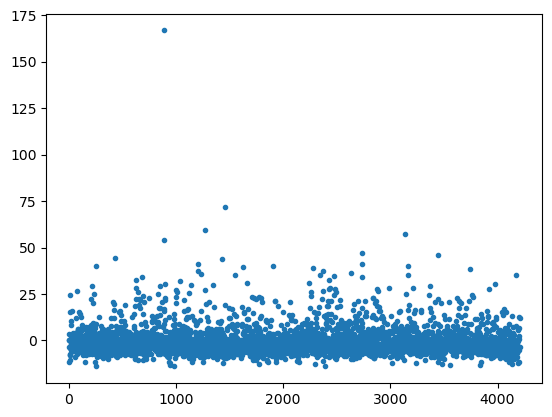

In [72]:
import matplotlib.pyplot as plt

plt.plot(err_train, '.')

<Axes: xlabel='Actual', ylabel='Predicted'>

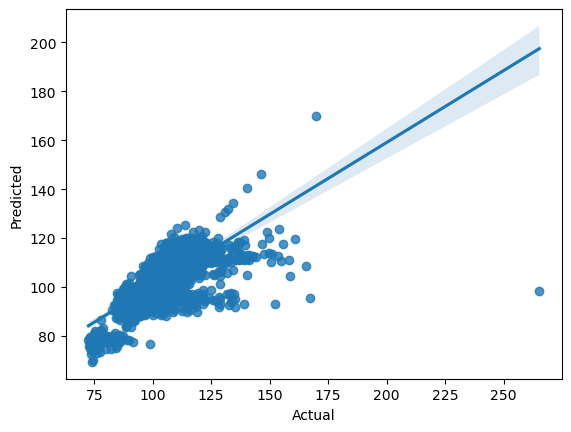

In [74]:
import seaborn as sns

actual_pred = pd.DataFrame()
actual_pred['Actual'] = tr_train_y
actual_pred['Predicted'] = pred_train


sns.regplot(x = 'Actual' , y = 'Predicted', data = actual_pred)

In [75]:
# Evaluate model on train

from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(tr_train_y, pred_train)
mse_train

68.2207257335115

In [76]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(tr_train_y, pred_train) * 100

4.996030631777041

In [77]:
# Evaluate our model on test

pred_test = linreg.predict(tr_test_x)
err_test = tr_test_y - pred_test

In [78]:
mse_test = mean_squared_error(tr_test_y, pred_test)
mse_test

1.1694312749941195e+19

In [79]:
mean_absolute_percentage_error(tr_test_y, pred_test)*100

147791349.97630978

In [80]:
# model is doing very good on train but failing on test

# YOUR MODEL HAS BEEN OVERFITTED

In [81]:
# why is model failing on test data ???

In [82]:
err_train

40      -1.791934
1611    -2.893535
891     15.608486
450      1.452646
3869     8.704971
          ...    
4106     2.996240
3562    -0.512070
3692    -0.134111
2027     1.636914
1997     3.614678
Name: y, Length: 3367, dtype: float64

In [83]:
err_test

3762   -3.628994e+00
1019   -8.488896e+00
3041    1.234104e+01
205    -2.975000e-01
2105   -3.691133e+00
            ...     
1135    1.050217e+01
3591   -3.761602e+00
1662    9.881958e+10
2924    6.015625e-03
3601   -1.714092e+00
Name: y, Length: 842, dtype: float64

In [84]:
tr.y.describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

In [85]:
pred_train.min()

69.359375

In [86]:
pred_train.max()

169.90966796875

In [87]:
pred_test.min()

-98819582006.46216

In [88]:
pred_test.max()

131.88330078125

In [89]:
err_train.min()

-14.001289062500007

In [90]:
err_train.max()

166.793388671875

In [91]:
err_test.min()

-21.247441406250005

In [92]:
err_test.max()

98819582094.18216

In [93]:
# from above observation
# model
# train
# on test predicted values are very large

In [94]:
list(linreg.coef_)

[0.07769459767348334,
 -0.04252396568563599,
 -0.012885796652575277,
 -0.10988104020192013,
 -0.5490296313539641,
 -0.07906366831297817,
 0.053846257666224195,
 0.0006688865663984078,
 -116069560452.06483,
 594380643214.7747,
 -116069560452.34215,
 131198191417.34189,
 -116069560453.17445,
 120060208154.89023,
 -116069560446.97934,
 92431395148.5743,
 -116069560443.78314,
 -116069560452.86674,
 -116069560453.63098,
 116954414057.53743,
 -116069560453.98103,
 -116069560454.4601,
 -9585334323.388987,
 -116069560450.57101,
 0.44976234436035156,
 -116069560453.84955,
 -174912406982.84283,
 -116069560470.81909,
 323844669672.623,
 -116069560455.13896,
 43828200824.3787,
 -116069560449.88004,
 -195100145944.9346,
 -116069560457.04514,
 -128744523726.65483,
 -1.5982952117919922,
 -43828200830.61979,
 5937401460.381324,
 5937401461.3057785,
 5.1666377782821655,
 -0.22313451766967773,
 52576999001.95623,
 -6.781032562255859,
 0.4119377136230469,
 5.8778762221336365,
 61277532891.10552,
 3.98868

In [95]:
linreg.intercept_

1224050753822.188

In [96]:
# root cause of error is high beta values
# beacuse model has mimiced the data

# regularization or generalization technique

In [99]:
# regularization or generalization technique
# regularization or generalization technique is used toover come the problem of over fitting
# In linear regression we can use Lasso (l1) and Ridge (l2)
# ridge and lasso are regularization or generalization technique
# both ridge and lasso are algorithm

In [100]:
# Ridge (l2) and Lasso (l1)

In [101]:
# very imp
# COST FUNCTION (loss function) (error function)
# It is used in every model
# cost function is used to measure the amount of error in the model

In [102]:
# In linear regression cost function is MSE

In [103]:
# lambda is sequence of number at regular interval
# lambda of 10 number between 0 and 1 (0,1,2,3,......)
# lambda is also a positive number

In [104]:
# OVER FITTING - where error is less in trains

In [105]:
# ERROR IN LASSO IS MORE THAN ERROR IN LINEAR
# ERROR IN RIDGE IS MORE THAN ERROR IN LINEAR

# IF I INCREASE ERRORS IN TRAIN DATA OVERFITTING WILL AUTOMATICALLY DECREASE
# SO IN RIDGE AND LASSO WE PURPOSEFULLY INCREASE THE ERRORS WHILE TRAINING THE MODEL SO THAT CHANCES OF OVERFITTING REDUCE

In [106]:
# cost function used to measure the amount of error in your model it is also MSE

In [117]:
# Lasso and Ridge (FUNCTIONS)

# 1) ridge and lasso are regularization or generalization technique
# 2) Over come the problem of overfitting
# 3) Used to overcome the problem of multi-colinearity
# 4) lasso can be used for feature selection and ridge cannot be used for feature selection
# 5) cost function in lasso and ridge

In [138]:
# to solve the problem of multicolinearity
# which is predicted values would be far away from actual values

# we have shrunk(dimnished) the beta values
# by building ridge and lasso model

In [140]:
# lasso can be used for feature selection(importance), ridge cannot be used for feature selection

# feature selection is used to find which X variables are more important compared to others
# In lasso few or more beta values may exactly become zero and hence can be used for feature selection
# In ridge few or more beta values may or may not exactly become zero and hence cannot be used for feature selection

# Lasso model

In [143]:
from sklearn.linear_model import Lasso
las = Lasso()
las.fit(tr_train_x, tr_train_y)
las.score(tr_train_x, tr_train_y)

0.37968184049278564

In [144]:
pred_train_las = las.predict(tr_train_x)
pred_test_las = las.predict(tr_test_x)

In [145]:
mean_absolute_percentage_error(tr_train_y, pred_train_las)*100

6.723381036306174

In [146]:
mean_absolute_percentage_error(tr_test_y, pred_test_las)*100

6.5312729732393855

In [147]:
mse_train = mean_squared_error(tr_train_y, pred_train)
mse_train

68.2207257335115

In [150]:
mse_test = mean_squared_error(tr_test_y, pred_test_las)
mse_test

81.61065397144947

In [157]:
list(las.coef_) 


[-0.04483117946565319,
 -0.010617515058201916,
 -0.0,
 -0.2903854257782893,
 -0.0,
 -0.05392661158474827,
 -0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 2.569422171333744,
 1.835244700570736e-14,
 -0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 -0.0

In [159]:
list(set(las.coef_))

[-0.0,
 -0.2903854257782893,
 2.569422171333744,
 10.940126422018603,
 1.835244700570736e-14,
 -0.04483117946565319,
 -0.010617515058201916,
 -0.05392661158474827]

In [161]:
len(list(set(las.coef_)))-1

7

In [163]:
# if number of x variables itself are reduced then problem of multi correlation can be taken care off

In [165]:
# Now Is want names of only those x variables whose coef is non zero

feat_imp = pd.DataFrame()
feat_imp['Feature'] = tr_train_x.columns
feat_imp['coef']= las.coef_

In [167]:
feat_imp[feat_imp.coef != 0]

,Feature,coef
0,X0,-4.483118e-02
1,X1,-1.061752e-02
3,X3,-2.903854e-01
5,X5,-5.392661e-02
114,X118,2.569422e+00
115,X119,1.835245e-14
305,X314,1.094013e+01


In [169]:
feat_imp[~(feat_imp.coef == 0)]

,Feature,coef
0,X0,-4.483118e-02
1,X1,-1.061752e-02
3,X3,-2.903854e-01
5,X5,-5.392661e-02
114,X118,2.569422e+00
115,X119,1.835245e-14
305,X314,1.094013e+01


# Ridge

In [172]:
from sklearn.linear_model import Ridge
rid = Ridge()
rid.fit(tr_train_x,tr_train_y)
rid.score(tr_train_x,tr_train_y)

0.5850820927412341

In [174]:
pred_train_rid = rid.predict(tr_train_x)
pred_test_rid = rid.predict(tr_test_x)

In [176]:
mean_absolute_percentage_error(tr_train_y, pred_train_rid)*100

5.026843185306433

In [178]:
mean_absolute_percentage_error(tr_test_y, pred_test_rid)*100

5.3146345397954455

In [180]:
mse_train = mean_squared_error(tr_train_y, pred_train_rid)
mse_train

68.64630106359775

In [182]:
mse_test = mean_squared_error(tr_test_y, pred_test_rid)
mse_test

58.90757985483563

In [184]:
feat_imp1 = pd.DataFrame()
feat_imp1['Feature'] = tr_train_x.columns
feat_imp1['coef']= rid.coef_

In [186]:
feat_imp1[feat_imp1.coef != 0]

,Feature,coef
0,X0,0.078041
1,X1,-0.045892
2,X2,-0.024742
3,X3,-0.086922
4,X4,-0.583131
...,...,...
371,X380,-0.793474
372,X382,-2.014633
373,X383,8.745050
374,X384,-0.923060


In [188]:
len(list(set(las.coef_)))-1

7

In [190]:
len(rid.coef_[rid.coef_ != 0])

363

In [192]:
len(rid.coef_[rid.coef_ == 0])

13

In [194]:
rid.coef_.max()

16.148591255579085

In [196]:
linreg.coef_.max()

759018470191.0195

In [198]:
rid.coef_.min()

-7.817840357750442

In [200]:
linreg.coef_.min()

-937900327746.2395